<a href="https://colab.research.google.com/github/rameshboggu36/credit_card_fraud_detection/blob/master/ccfd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
```
#        **CREDIT CARD FRAUD DETECTION USING LOGISTIC REGRESSION**
```
```



```
FIRST STEP of the project is to import the required libraries.
1.numpy for dealing with arrays
2.pandas for delaing with the dataset as dataframes.
3.train_test_split from sklearn.model_selection for splitting the data into training and testing data.
4.LogisticRegression model from sklearn.linear_model
5.accuracy_score from sklearn.metrics.
```



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
## loading the dataset into pandas dataframe
credit_card_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0




```
```
#SUMMARY OF THE DATA
```
1.Time which is given in the first column is the time elapsed of the transaction from the first transaction, which is done at time 0.
For example, if time is 60, then that particular transaction happend one minute after the first transaction.
2. After seeing all the columns, except transaction and the amount we dont know the details of other columns (V1,V2...V28).
As the credit card details are very sensitive they cant be shared. Those columns represent the features of a particular transaction which undergone a Principal component analysis.
3.The column Class shows whether the transaction is legit or a fraudlent transaction.
If the label is 0 it is legal transaction.
If the label is 1 it is fraudlent transaction.
```




In [ ]:
#column names of the dataframe
credit_card_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
#credit card data information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#statistical measure of data i.e.,different parameters of each column like min,max,mean,standard deviation,count,etc..
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#checking the number of missing vaues in every column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

```
1. We found that all the colums are having not-null values. So there is no missing of data.
```

In [ ]:
#getting the number of legit and fraud transactions count based on the Class columns
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

```
Here we can see the data is very imbalance i.e., there are very low fraudlent transactions compared to legit transactions.
If we use this data to predict the fraudlent transactions we wont be able to do it because of very less number of fraudlent transaction.
In handling imbalance data data preprocessing plays an important role.
```

In [ ]:
#separating the data into legit and fraud
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data.Class==1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
print('Legit transactions are', round(len(legit)/len(credit_card_data) * 100,3), '% of the dataset')
print('Fraud transactions are', round(len(fraud)/len(credit_card_data) * 100,3), '% of the dataset')

Legit transactions are 99.827 % of the dataset
Fraud transactions are 0.173 % of the dataset


In [ ]:
#statistical measure of legit transactions amount
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
#statistical measure of fraud transactions amount
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

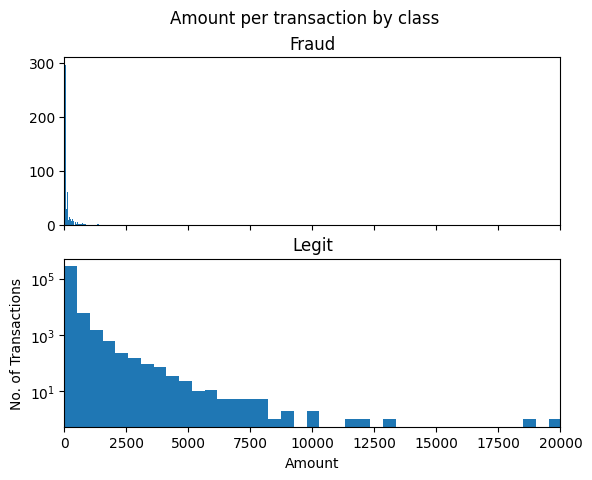

In [ ]:
f,(ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
bins=50
ax1.hist(fraud.Amount,bins = bins)
ax1.set_title('Fraud')
ax2.hist(legit.Amount,bins=bins)
ax2.set_title('Legit')
plt.xlabel('Amount')
plt.ylabel('No. of Transactions')
plt.xlim(0,20000)
plt.yscale('log')
plt.show();

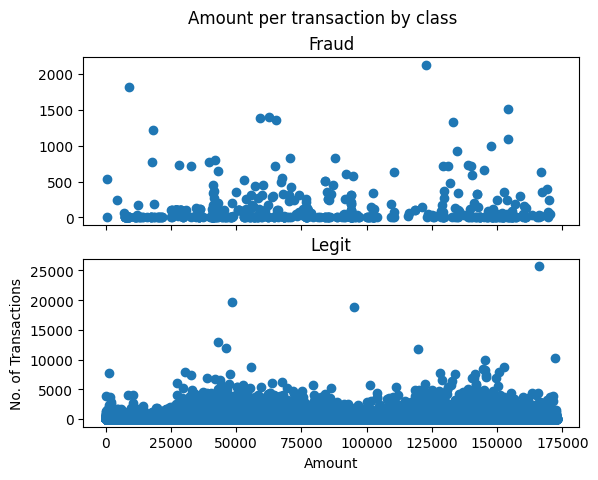

In [ ]:
f,(ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
ax1.scatter(fraud.Time,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time,legit.Amount)
ax2.set_title('Legit')
plt.xlabel('Amount')
plt.ylabel('No. of Transactions')
plt.show();

In [ ]:
#comparing the data of legit and fraud transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


```
As the data of the given dataframe is very imbalanced, we need to create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases.
This will help our algorithms better understand patterns that determines whether a transaction is a fraud or not.

```
# Sub-Sample
```
In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions.
Meaning our sub-sample will have the same amount of fraud and non fraud transactions.
There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
We concat the 492 cases of fraud and non fraud, creating a new sub-sample.
```

In [ ]:
#taking random values of legit transactions of same number as fraud (492)
legit_sample = legit.sample(n=492)

In [ ]:
new_data = pd.concat([legit_sample,fraud],axis=0)
#here axis = 0 will make sure that both dataframes are added row wise, i.e., one by one.

In [ ]:
print(new_data.shape)

(984, 31)


In [ ]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
81905,59155.0,-0.744463,0.558795,2.248225,0.307861,-0.393668,-0.188102,0.213076,0.172334,0.134392,...,0.217776,0.947462,-0.065523,0.692805,-0.209046,0.448235,0.375011,0.204084,29.99,0
173798,121643.0,-0.844779,1.671097,-1.158888,-0.594220,0.297300,-0.696691,0.213914,0.844230,-0.582581,...,-0.215960,-0.681864,0.202939,0.678462,-0.343424,0.092711,0.083682,0.002507,10.70,0
27465,34559.0,1.158888,-1.410683,-0.361133,-1.625830,0.582542,3.815335,-1.694816,1.003413,-0.368002,...,-0.145698,-0.315493,-0.063696,1.051188,0.079803,1.117530,-0.020791,0.041303,125.90,0
160862,113712.0,2.180784,-1.113085,-1.029359,-1.226101,-0.436115,0.542190,-1.200836,0.199487,0.006337,...,0.305108,0.869746,0.038093,-0.333705,-0.057559,-0.071332,-0.000847,-0.061886,19.00,0
41727,40802.0,-2.570550,-2.520956,0.452020,-0.929115,-0.271081,-1.774275,0.032709,0.316445,-1.393968,...,0.523042,-0.097452,0.707931,0.324017,-0.218058,-0.583526,-0.088677,-0.221303,319.00,0


In [ ]:
#getting the number of legit and fraud transactions in the new dataframe count based on the Class columns
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
print('Legit transactions are', round(len(legit_sample)/len(new_data) * 100,3), '% of the new dataframe')
print('Fraud transactions are', round(len(fraud)/len(new_data) * 100,3), '% of the new dataframe')

Legit transactions are 50.0 % of the new dataframe
Fraud transactions are 50.0 % of the new dataframe


In [ ]:
legit_sample.Amount.describe()

count     492.000000
mean       75.590955
std       191.911221
min         0.000000
25%         5.000000
50%        20.200000
75%        64.110000
max      2003.330000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#comparing the new dataframe of legit and fraud transactions
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95647.837398,-0.158581,0.083216,0.054153,0.057773,-0.009567,-0.038210,-0.029360,0.040743,0.005734,...,-0.034443,0.007090,0.026129,-0.007855,0.00202,0.035950,-0.016208,-0.060390,0.001918,75.590955
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
#for comparing the random legit sample and original legit sample by comparing the mean values of both samples
comp = pd.concat([new_data.groupby('Class').mean(),credit_card_data.groupby('Class').mean()],axis=0)
comp.iloc[[0,2]]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95647.837398,-0.158581,0.083216,0.054153,0.057773,-0.009567,-0.038210,-0.029360,0.040743,0.005734,...,-0.034443,0.007090,0.026129,-0.007855,0.002020,0.035950,-0.016208,-0.060390,0.001918,75.590955
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022


```
here we can see, the random sample of legit transactions of 492 from 284315 showing the same statistical measurments as of the original legit transactions. So, the random sample can be used for the prediction of fraudlent transactions.
```



```
```
# Splitting the data into Features and Targets
```
```


In [ ]:
X = new_data.drop(columns = 'Class',axis = 1)
Y = new_data['Class']

In [ ]:
print(X)
print(Y)

            Time        V1        V2        V3        V4        V5        V6  \
81905    59155.0 -0.744463  0.558795  2.248225  0.307861 -0.393668 -0.188102   
173798  121643.0 -0.844779  1.671097 -1.158888 -0.594220  0.297300 -0.696691   
27465    34559.0  1.158888 -1.410683 -0.361133 -1.625830  0.582542  3.815335   
160862  113712.0  2.180784 -1.113085 -1.029359 -1.226101 -0.436115  0.542190   
41727    40802.0 -2.570550 -2.520956  0.452020 -0.929115 -0.271081 -1.774275   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

```
here we can see the new data is splitted into features(input) and Target(output).
Features are Time, V1,V2.....V28, Amount.
Targets are Class (0 or 1)
1 ----> Fraud transaction
0 ----> Legit transaction
```


```
```
# Splitting the data into Training Data and Testing Data
```
```



In [ ]:
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

```
 here we are using train_test_split() function for dividing the given data into training set and testing set.
 here test_size = 0.2 means 20% of the data is stored in testing sample and 80% of the data in the training sample.
 X_train will have the 80% of data and Y_train will have the values corresponding to X_train.
 X_test will have 20% of data and Y_test will have values corresponding to X_test.
 we mentioned stratify = Y, i.e., we divide the data by having Y as centre
 which means the divided data will have equal distribution of Y values.
```

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [ ]:
scl = StandardScaler()
scl.fit(X_train)

X_train_scaler = scl.transform(X_train)
X_test_scaler = scl.transform(X_test)

In [ ]:
X_train_scaler

array([[-0.41372034,  0.30712159, -0.50602864, ...,  0.08733892,
        -0.38696517,  1.84104445],
       [ 0.59094619,  0.34882536, -0.26970263, ..., -1.20577287,
        -3.20791375, -0.42316731],
       [-0.7972569 ,  0.6715361 , -0.46142554, ..., -0.07317981,
        -0.08422096, -0.36126061],
       ...,
       [ 1.09821065,  0.07639243,  0.51295523, ...,  0.40664886,
        -0.21786406, -0.42842628],
       [-0.93608717, -2.32948039,  1.7171951 , ..., -1.30463435,
        -1.72233106, -0.29127912],
       [-1.182746  , -0.27274301, -0.29296265, ..., -0.8129362 ,
         0.12157569, -0.36974949]])

In [ ]:
X_train_scaler = pd.DataFrame(X_train_scaler, columns=X_train.columns)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=X_test.columns)


```
```
# Model Training
```
here we are using Logistic regression model. we can use different models but for binary classifications most frequently used model is logistic regression.
```


In [ ]:
model = LogisticRegression(random_state=30)

In [ ]:
model.fit(X_train_scaler,Y_train)

LogisticRegression(random_state=30)


```
```
# Model Evaluation
```
Accuracy score



In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train_scaler)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data: ',training_data_accuracy )


Accuracy on training data:  0.9529860228716646


In [ ]:
X_test_prediction = model.predict(X_test_scaler)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on testing data: ',testing_data_accuracy )

Accuracy on testing data:  0.934010152284264


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [ ]:
print("Accuracy Score",accuracy_score(X_test_prediction,Y_test))
print("Precision score",precision_score(X_test_prediction,Y_test))
print("recall score",recall_score(X_test_prediction,Y_test))
print("F1 score",f1_score(X_test_prediction,Y_test))
print("Matthews score",matthews_corrcoef(X_test_prediction,Y_test))

Accuracy Score 0.934010152284264
Precision score 0.8775510204081632
recall score 0.9885057471264368
F1 score 0.9297297297297297
Matthews score 0.8734119362123363




```
Accuracy Score 0.9238578680203046
Precision score 0.8775510204081632
recall score 0.9662921348314607
F1 score 0.9197860962566844
Matthews score 0.8512052652111101
```



RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
model_Rand = RandomForestRegressor(n_estimators=100,
                                  random_state=30)

In [ ]:
model_Rand.fit(X_train_scaler,Y_train)

RandomForestRegressor(random_state=30)

Accuracy

In [ ]:
#accuracy on training data
Y_train_pred_rand = model_Rand.predict(X_train_scaler)
training_data_accuracy = accuracy_score(Y_train_pred_rand.round(),Y_train)
print('Accuracy on training data: ',training_data_accuracy )

Accuracy on training data:  1.0


In [ ]:
Y_test_pred_rand = model_Rand.predict(X_test_scaler)
testing_data_accuracy = accuracy_score(Y_test_pred_rand.round(),Y_test)
print('Accuracy on testing data: ',testing_data_accuracy )

Accuracy on testing data:  0.9390862944162437


In [ ]:
print("Accuracy Score",accuracy_score(Y_test_pred_rand.round(),Y_test))
print("Precision score",precision_score(Y_test_pred_rand.round(),Y_test))
print("recall score",recall_score(Y_test_pred_rand.round(),Y_test))
print("F1 score",f1_score(Y_test_pred_rand.round(),Y_test))
print("Matthews score",matthews_corrcoef(Y_test_pred_rand.round(),Y_test))

Accuracy Score 0.9390862944162437
Precision score 0.8877551020408163
recall score 0.9886363636363636
F1 score 0.935483870967742
Matthews score 0.8826721665214399




```
Accuracy Score 0.9187817258883249
Precision score 0.8979591836734694
recall score 0.9361702127659575
F1 score 0.9166666666666666
Matthews score 0.838217532426382
```



SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svm = SVC(kernel="rbf", gamma = 0.5, C=1.0)

In [ ]:
model_svm.fit(X_train_scaler,Y_train)

SVC(gamma=0.5)

In [ ]:
Y_train_pred_svm = model_svm.predict(X_train_scaler)
training_data_accuracy = accuracy_score(Y_train_pred_svm.round(),Y_train)
print('Accuracy on training data: ',training_data_accuracy )

Accuracy on training data:  0.9923761118170267


In [ ]:
Y_test_pred_svm = model_svm.predict(X_test_scaler)
testing_data_accuracy = accuracy_score(Y_test_pred_svm.round(),Y_test)
print('Accuracy on testing data: ',testing_data_accuracy )

Accuracy on testing data:  0.8223350253807107


In [ ]:
print("Accuracy Score",accuracy_score(Y_test_pred_svm.round(),Y_test))
print("Precision score",precision_score(Y_test_pred_svm.round(),Y_test))
print("recall score",recall_score(Y_test_pred_svm.round(),Y_test))
print("F1 score",f1_score(Y_test_pred_svm.round(),Y_test))
print("Matthews score",matthews_corrcoef(Y_test_pred_svm.round(),Y_test))

Accuracy Score 0.8223350253807107
Precision score 0.9285714285714286
recall score 0.7647058823529411
F1 score 0.8387096774193549
Matthews score 0.6601910890701026




```
Accuracy Score 0.8730964467005076
Precision score 0.9183673469387755
recall score 0.8411214953271028
F1 score 0.8780487804878049
Matthews score 0.7494361930174551
```

